In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to your file in Google Drive
file_path ='/content/balanced_dataset (2).csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,�Alkphos Alkaline Phosphotase,�Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,�ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [ ]:
df.isna().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
�Alkphos Alkaline Phosphotase,0
�Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
�ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender of the patient'] = label_encoder.fit_transform(df['Gender of the patient'])

# Display the updated DataFrame
print(df)

       Age of the patient  Gender of the patient  Total Bilirubin  \
0                      65                      0             0.70   
1                      62                      1            10.90   
2                      62                      1             7.30   
3                      58                      1             1.00   
4                      72                      1             3.90   
...                   ...                    ...              ...   
43938                  25                      1             1.67   
43939                  24                      1             2.54   
43940                  24                      1             2.22   
43941                  24                      1             2.12   
43942                  24                      1             2.23   

       Direct Bilirubin  �Alkphos Alkaline Phosphotase  \
0                  0.10                            187   
1                  5.50                            699 

In [ ]:
df['Gender of the patient'] = df['Gender of the patient'].astype(float)

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,�Alkphos Alkaline Phosphotase,�Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,�ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


Correlation Matrix:
                                      Age of the patient  \
Age of the patient                              1.000000   
Gender of the patient                           0.026425   
Total Bilirubin                                -0.001600   
Direct Bilirubin                               -0.001521   
�Alkphos Alkaline Phosphotase                  -0.000761   
�Sgpt Alamine Aminotransferase                  0.000659   
Sgot Aspartate Aminotransferase                 0.006104   
Total Protiens                                 -0.007951   
�ALB Albumin                                   -0.015164   
A/G Ratio Albumin and Globulin Ratio           -0.018056   
Result                                         -0.004759   

                                      Gender of the patient  Total Bilirubin  \
Age of the patient                                 0.026425        -0.001600   
Gender of the patient                              1.000000         0.010200   
Total Bilirubin    

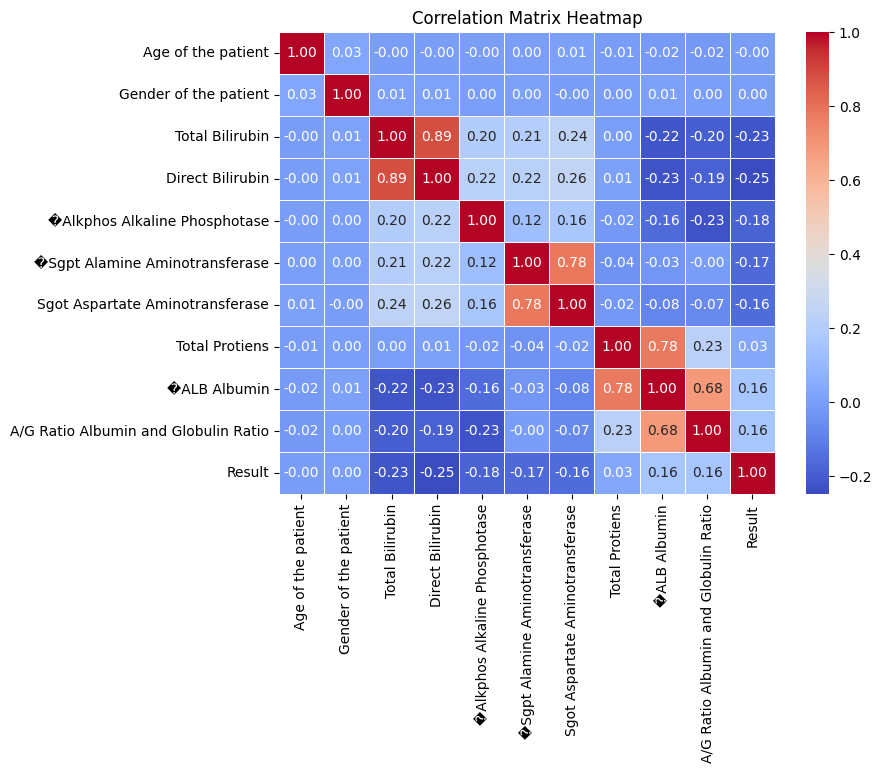

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Median Imputation
imputer = SimpleImputer(strategy='median')
df['Age of the patient'] = imputer.fit_transform(df[['Age of the patient']])

In [ ]:
df.isna().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
�Alkphos Alkaline Phosphotase,0
�Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
�ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [
    '�Sgpt Alamine Aminotransferase', '�Alkphos Alkaline Phosphotase','Direct Bilirubin','Total Bilirubin'
]
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [
    'Sgot Aspartate Aminotransferase', 'Total Protiens','�ALB Albumin','A/G Ratio Albumin and Globulin Ratio'
]
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('processed_liver_dataset.csv', index=False)

In [ ]:
file_path = '/content/processed_liver_dataset.csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
df['Result'] = df['Result'].replace({1: 0, 2: 1})

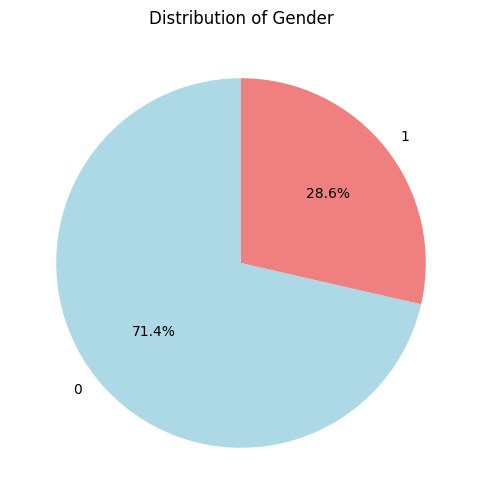

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts=df['Result'].value_counts()
plt.figure(figsize=(6, 6))  # Set the size of the plot
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title and labels
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-label

# Display the plot
plt.show()

In [ ]:
# Step 1: Install imbalanced-learn (if not already installed)
# pip install imbalanced-learn

# Step 2: Load your dataset
import pandas as pd
from collections import Counter

# Example: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = df.drop('Result', axis=1)  # Replace 'target' with your target column name
y = df['Result']  # Replace 'target' with your target column name

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y))

# Step 3: Apply ADASYN
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_resampled))

# Step 4: Save the balanced dataset
# Combine the resampled features and target into a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Result'] = y_resampled  # Replace 'target' with your target column name

# Save the balanced dataset to a CSV file
balanced_df.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved to 'balanced_dataset.csv'")

Class distribution before ADASYN: Counter({1: 21917, 2: 8774})
Class distribution after ADASYN: Counter({2: 22026, 1: 21917})
Balanced dataset saved to 'balanced_dataset.csv'


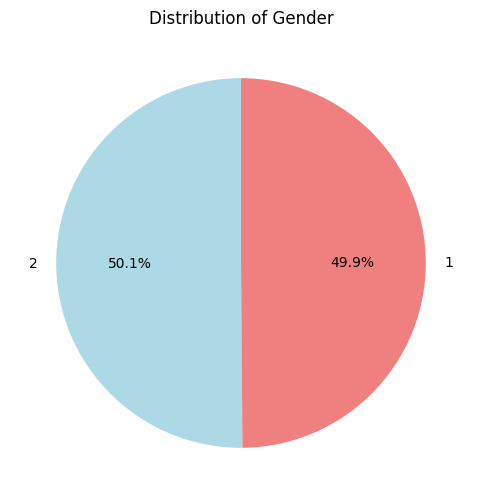

In [ ]:
file_path = '/content/balanced_dataset.csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)
value_counts=df['Result'].value_counts()
plt.figure(figsize=(6, 6))  # Set the size of the plot
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title and labels
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-label

# Display the plot
plt.show()


In [ ]:
df = pd.read_csv("/content/balanced_dataset.csv")

In [ ]:
df['Result'].value_counts()

,count
Result,
2,22026
1,21917


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("balanced_dataset.csv")  # Change to your actual file

# Replace values in the 'result' column
df['Result'] = df['Result'].replace({1: 0, 2: 1})

# Save the modified dataset if needed
df.to_csv("balanced1_dataset.csv", index=False)

# Display the first few rows to verify
print(df.head(15))
df['Result'].value_counts()


    Age of the patient  Gender of the patient  Total Bilirubin  \
0                 65.0                    0.0              0.7   
1                 62.0                    1.0             10.9   
2                 62.0                    1.0              7.3   
3                 58.0                    1.0              1.0   
4                 72.0                    1.0              3.9   
5                 46.0                    1.0              1.8   
6                 26.0                    0.0              0.9   
7                 29.0                    0.0              0.9   
8                 17.0                    1.0              0.9   
9                 55.0                    1.0              0.7   
10                57.0                    1.0              0.6   
11                72.0                    1.0              2.7   
12                64.0                    1.0              0.9   
13                74.0                    0.0              1.1   
14        

,count
Result,
1,22026
0,21917


In [ ]:
file_path = '/content/balanced_dataset.csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Convert specific columns to int
int_cols = ['Age of the patient','Gender of the patient','�Alkphos Alkaline Phosphotase'	,'�Sgpt Alamine Aminotransferase'	,'Sgot Aspartate Aminotransferase']
df[int_cols] = df[int_cols].astype(int)a

# Convert specific columns to float with 2 decimals
float_cols = ['Total Protiens'	,'�ALB Albumin',	'A/G Ratio Albumin and Globulin Ratio','Total Bilirubin','Direct Bilirubin'

]
df[float_cols] = df[float_cols].astype(float).round(2)

# Display output

df.to_csv("balanced_dataset.csv", index=False)



In [ ]:
!python --version

Python 3.11.11
